In [1]:
%load_ext autoreload
%autoreload 2

import torch
import matplotlib.pyplot as plt

from training.util import sgd, plot_losses

/home/flo/anaconda3/envs/bdl2/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import experiments.base.cifar as cifar

batch_size = 4
trainloader = cifar.cifar10_trainloader("/mnt/d/Uni/Bachelorarbeit/linux/data/", batch_size=batch_size)
testloader = cifar.cifar10_testloader("/mnt/d/Uni/Bachelorarbeit/linux/data/", batch_size=batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [3]:
device = torch.device("cuda")

In [4]:
import experiments.base.cifar as cifar
corrupted_testloader = cifar.cifar10_corrupted_testloader("/mnt/d/Uni/Bachelorarbeit/linux/data/", intensity=1, batch_size=128)

In [5]:
from training.pp import MAP
from training.vogn import iVONModuleFunctorch

layers = [
    ("drop-preresnet-20", (32, 3, 10, 0.1)),
    ("logsoftmax", ())
]

pp = MAP(layers)
#pp.train_model(5, torch.nn.NLLLoss(), sgd(0.001), trainloader, batch_size, device)

In [6]:
import experiments.base.multiclass_classification as exp

pp.to(device)
exp.eval_model(pp, 5, corrupted_testloader, device)

 Accuracy: 0.11781052500009537
 Avg Log Likelihood: -2.321131467819214
 Avg Likelihood: 0.1004771962761879
 ECE: 0.016272665163090356


(tensor(0.1178),
 tensor(-2.3211),
 tensor(0.1005),
 <training.calibration.ClassificationCalibrationResults at 0x7fc035399970>)

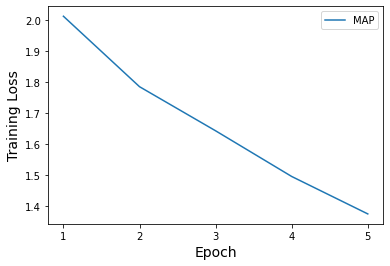

In [10]:
plot_losses("MAP", pp.all_losses(), plt.subplot())